## Medical Cost Prediction

This project was undertaken for learning purposes, where I implemented various models including Linear Regression, Decision Tree, Random Forest, Lasso, and Ridge - to analyze and predict medical costs.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('dataset/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values

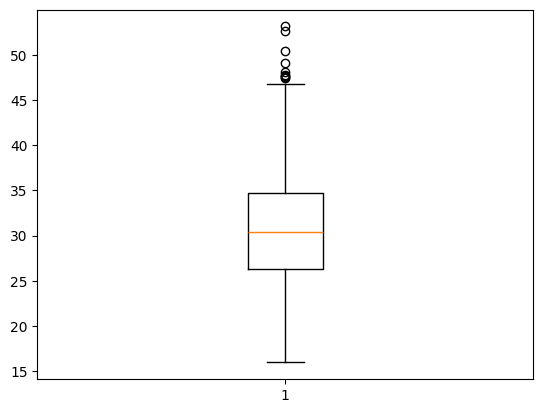

In [25]:
plt.boxplot(df['bmi'])
plt.show()

We can see some data points greater than the highest expected, though they are not outliers as BMI for a person can be in range from ~13-100. But, we will remove them to keep the data more balanced and improve accuracy.

In [29]:
# detect outlier using IQR
max_t = df['bmi'].quantile(0.95)
min_t = df['bmi'].quantile(0.05)

# df[df['bmi'] > max_t]
df[df['bmi'] < min_t]

,age,sex,bmi,children,smoker,region,charges
28,23,male,17.385,1,no,northwest,2775.19215
35,19,male,20.425,0,no,northwest,1625.43375
37,26,male,20.800,0,no,southwest,2302.30000
98,56,male,19.950,0,yes,northeast,22412.64850
99,38,male,19.300,0,yes,southwest,15820.69900
...,...,...,...,...,...,...,...
1260,32,female,20.520,0,no,northeast,4544.23480
1286,28,female,17.290,0,no,northeast,3732.62510
1290,38,female,19.950,2,no,northeast,7133.90250
1302,25,female,20.800,1,no,southwest,3208.78700


In [30]:
# remove outlier
df = df[(df['bmi'] < max_t) & (df['bmi'] > min_t)]

In [31]:
df.shape

(1204, 7)

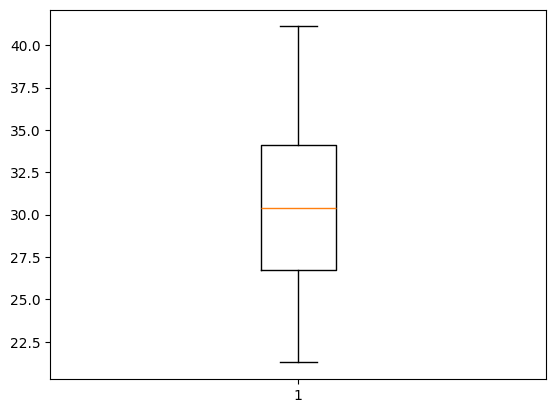

In [32]:
plt.boxplot(df['bmi'])
plt.show()

Now looks good!

In [33]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
from sklearn.preprocessing import LabelEncoder

x = df.drop('charges', axis='columns')
y = df['charges']

le = LabelEncoder()

x['sex'] = le.fit_transform(x['sex'])
x['smoker'] = le.fit_transform(x['smoker'])
x['region'] = le.fit_transform(x['region'])

x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
x_train.shape, x_test.shape

((963, 6), (241, 6))

In [39]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
linear_model.score(x_test, y_test)

0.797291096225845

In [40]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)

# Score
print("Ridge:", ridge.score(x_test, y_test))
print("Lasso:", lasso.score(x_test, y_test))

Ridge: 0.7966798802980362
Lasso: 0.7972909097367936


Linear, Ridge and Lasso have almost same score

In [45]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
tree.score(x_test, y_test)

0.7872472623101259

In [46]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
rf_model.score(x_test, y_test)

0.8807298203912914

In [48]:
from sklearn.metrics import mean_absolute_error
y_pred = rf_model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 2625.842650434855


In [50]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 21969533.46819427


In [53]:
rmse = root_mean_squared_error(y_test, y_pred)
print("RMSE:", rmse)

RMSE: 4687.166891438182


In [54]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.8807298203912914


> RandomForestRegressor turns out to be the model with best score

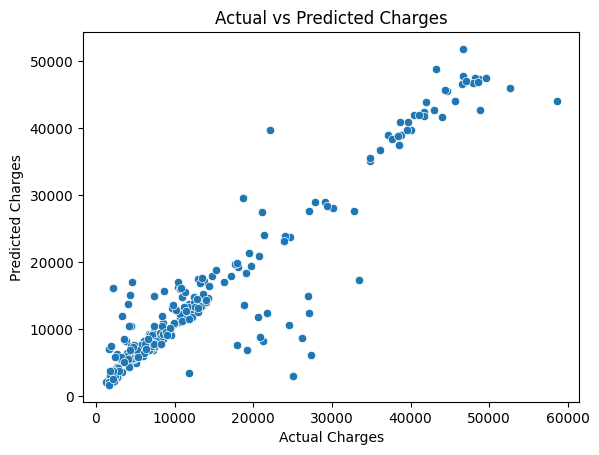

In [56]:
import seaborn as sns

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()

Exporting the model using joblib

In [60]:
import joblib

joblib.dump(rf_model, '../model/insurance_model.pkl')

['../model/insurance_model.pkl']

Loading and trying the model

In [62]:
x_test.head()

,age,sex,bmi,children,smoker,region
132,53,0,35.900,2,0,3
1003,48,1,29.600,0,0,3
955,31,1,39.490,1,0,2
471,18,0,30.115,0,0,0
810,46,0,30.800,3,0,3


In [63]:
my_model = joblib.load('../model/insurance_model.pkl')
my_model.predict(x_test.head())

array([12502.8761048,  8200.9009645,  8268.8383116, 16181.796494 ,
        9268.3164595])